In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

In [2]:
df = pd.read_csv('oceanographic and meteorological dataset.csv')

In [3]:
def add_direction_features(df, col):
    df[f'{col}_sin'] = np.sin(np.deg2rad(df[col]))
    df[f'{col}_cos'] = np.cos(np.deg2rad(df[col]))
    return df
df = add_direction_features(df, 'mwd_era5')
df = add_direction_features(df, 'mwd_cop')
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop,mwd_era5_sin,mwd_era5_cos,mwd_cop_sin,mwd_cop_cos
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,2184.000000,2184.000000,2184.000000,2184.000000,7993.000000,7993.000000,2184.000000,2184.000000
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202,-0.005831,-0.023458,2.396094,6.664016,260.916772,10.912761,-0.482059,0.436709,-0.450800,0.459881
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554,0.108640,0.109127,1.456047,1.374168,99.155991,2.368424,0.585773,0.483577,0.589320,0.488117
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695,-0.462891,-0.603516,0.620000,3.730000,0.030000,4.760000,-1.000000,-0.999988,-1.000000,-0.999941
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890,-0.082031,-0.090820,1.310000,5.590000,255.900000,9.130000,-0.926656,0.149474,-0.924246,0.172230
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711,-0.007812,-0.026367,1.860000,6.530000,294.380000,10.680000,-0.712566,0.533409,-0.667248,0.563454
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175,0.063477,0.043945,3.110000,7.620000,326.745000,12.432500,-0.268729,0.849137,-0.197144,0.891224
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710,0.558594,0.473633,9.290000,11.420000,359.920000,20.010000,1.000000,1.000000,1.000000,1.000000


In [4]:
df = df.dropna()
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop,mwd_era5_sin,mwd_era5_cos,mwd_cop_sin,mwd_cop_cos
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,2.192449,-0.730460,255.950462,8.431290,2.266529,10.372565,-0.009596,-0.019624,2.396094,6.664016,260.916772,10.912761,-0.474590,0.445223,-0.450800,0.459881
std,5.079766,5.736857,101.366399,1.510548,1.365365,2.244493,0.105901,0.107473,1.456047,1.374168,99.155991,2.368424,0.583893,0.485667,0.589320,0.488117
min,-9.547089,-17.162354,0.018279,5.445876,0.706664,4.671730,-0.449219,-0.603516,0.620000,3.730000,0.030000,4.760000,-1.000000,-0.999988,-1.000000,-0.999941
25%,-1.480034,-4.484627,247.180280,7.312723,1.254206,8.716774,-0.083984,-0.083984,1.310000,5.590000,255.900000,9.130000,-0.922565,0.153425,-0.924246,0.172230
50%,1.905762,-1.490417,292.653320,8.212036,1.747956,10.147072,-0.011719,-0.020508,1.860000,6.530000,294.380000,10.680000,-0.695971,0.543586,-0.667248,0.563454
75%,5.677345,3.126087,322.369933,9.229351,2.921544,11.816139,0.059570,0.044922,3.110000,7.620000,326.745000,12.432500,-0.257139,0.866078,-0.197144,0.891224
max,20.644135,16.901077,359.915250,14.486108,8.796758,19.196136,0.535156,0.473633,9.290000,11.420000,359.920000,20.010000,0.999997,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, 0 to 6549
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             2184 non-null   object 
 1   u10_era5         2184 non-null   float64
 2   v10_era5         2184 non-null   float64
 3   mwd_era5         2184 non-null   float64
 4   mwp_era5         2184 non-null   float64
 5   swh_era5         2184 non-null   float64
 6   pp1d_era5        2184 non-null   float64
 7   uo_cop           2184 non-null   float64
 8   vo_cop           2184 non-null   float64
 9   swh_cop          2184 non-null   float64
 10  mwp_cop          2184 non-null   float64
 11  mwd_cop          2184 non-null   float64
 12  peak_period_cop  2184 non-null   float64
 13  mwd_era5_sin     2184 non-null   float64
 14  mwd_era5_cos     2184 non-null   float64
 15  mwd_cop_sin      2184 non-null   float64
 16  mwd_cop_cos      2184 non-null   float64
dtypes: float64(16), obj

Criar Modelo

In [6]:
def create_supervised_dataset(df, features, target, lookback, horizon):
    X, y = [], []

    data = df[features + [target]].values

    for i in range(lookback, len(df) - horizon):
        X.append(data[i - lookback:i, :-1])
        y.append(data[i + horizon, -1])

    return np.array(X), np.array(y)

In [7]:
def temporal_train_val_test_split(X, y, train=0.7, val=0.1):
    n = len(X)
    n_train = int(n * train)
    n_val = int(n * (train + val))

    X_train = X[:n_train]
    y_train = y[:n_train]

    X_val = X[n_train:n_val]
    y_val = y[n_train:n_val]

    X_test = X[n_val:]
    y_test = y[n_val:]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [8]:
def scale_data(X_train, X_test):
    n_samples, timesteps, n_features = X_train.shape

    scaler = StandardScaler()
    X_train_2d = X_train.reshape(-1, n_features)
    X_test_2d  = X_test.reshape(-1, n_features)

    X_train_scaled = scaler.fit_transform(X_train_2d)
    X_test_scaled  = scaler.transform(X_test_2d)

    X_train_scaled = X_train_scaled.reshape(n_samples, timesteps, n_features)
    X_test_scaled  = X_test_scaled.reshape(X_test.shape[0], timesteps, n_features)

    return X_train_scaled, X_test_scaled, scaler

In [9]:
def build_cnn_model(input_shape):
    model = Sequential([
        # Forma moderna de definir a entrada
        Input(shape=input_shape), 
        
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [10]:
HORIZONS = [1, 2,4,8]
LOOKBACK = 48
TARGETS = ['swh_cop', 'mwp_cop', 'peak_period_cop','swh_era5', 'mwp_era5', 'pp1d_era5']
FEATURES = ['uo_cop', 'vo_cop', 'swh_cop', 'mwd_cop_sin','mwd_cop_cos', 'mwp_cop', 'peak_period_cop','u10_era5','v10_era5','swh_era5','mwd_era5_sin','mwd_era5_cos','mwp_era5','pp1d_era5']
results = []

for target in TARGETS:
    for h in HORIZONS:

        print(f'\nTreinar target={target} | horizonte={h}h')

        # criar dataset
        X, y = create_supervised_dataset(
            df,
            FEATURES,
            target,
            LOOKBACK,
            h
        )

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)

        X_train, X_test, scaler = scale_data(X_train, X_test)

        model = build_cnn_model(X_train.shape[1:])

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val,y_val),
            epochs=20,
            batch_size=32,
            verbose=2
        )

        y_pred = model.predict(X_test).ravel()

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)

        print(f'RMSE = {rmse:.3f} | MAE = {mae:.3f}')

        results.append({
            'target': target,
            'horizon': h,
            'rmse': rmse,
            'mae': mae
        })


Treinar target=swh_cop | horizonte=1h
Epoch 1/20
47/47 - 2s - 38ms/step - loss: 1.9076 - mae: 1.0110 - val_loss: 61.3225 - val_mae: 7.7383
Epoch 2/20
47/47 - 0s - 5ms/step - loss: 0.7768 - mae: 0.6594 - val_loss: 48.0096 - val_mae: 6.8309
Epoch 3/20
47/47 - 0s - 5ms/step - loss: 0.4522 - mae: 0.5008 - val_loss: 39.5206 - val_mae: 6.1820
Epoch 4/20
47/47 - 0s - 5ms/step - loss: 0.4142 - mae: 0.4671 - val_loss: 30.6884 - val_mae: 5.4457
Epoch 5/20
47/47 - 0s - 5ms/step - loss: 0.3357 - mae: 0.4260 - val_loss: 52.6086 - val_mae: 7.0673
Epoch 6/20
47/47 - 0s - 4ms/step - loss: 0.3373 - mae: 0.4199 - val_loss: 47.7836 - val_mae: 6.7459
Epoch 7/20
47/47 - 0s - 4ms/step - loss: 0.2888 - mae: 0.3957 - val_loss: 61.4435 - val_mae: 7.5913
Epoch 8/20
47/47 - 0s - 4ms/step - loss: 0.2629 - mae: 0.3726 - val_loss: 42.7054 - val_mae: 6.2427
Epoch 9/20
47/47 - 0s - 5ms/step - loss: 0.2530 - mae: 0.3591 - val_loss: 43.6904 - val_mae: 6.3628
Epoch 10/20
47/47 - 0s - 4ms/step - loss: 0.2454 - mae: 0.35

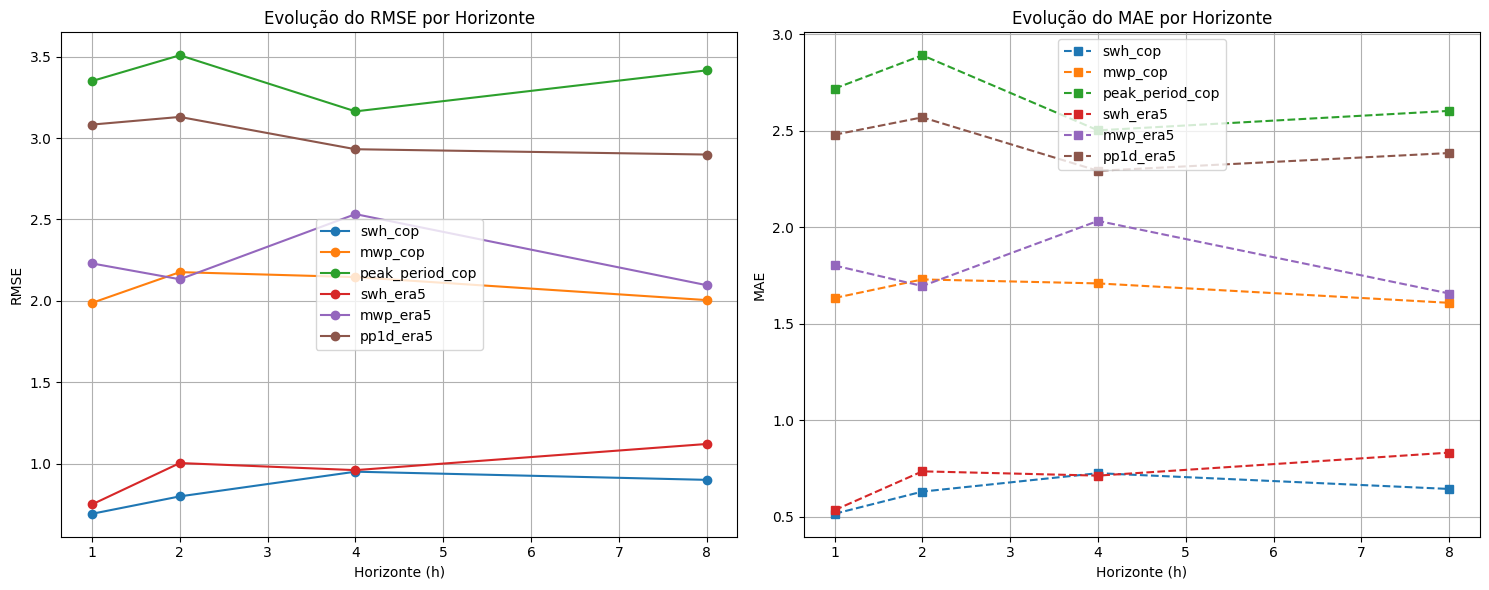

In [11]:
import matplotlib.pyplot as plt
results_df = pd.DataFrame(results)
# Criar uma figura com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for target in TARGETS:
    subset = results_df[results_df['target'] == target]
    
    # Gráfico 1: RMSE
    ax1.plot(subset['horizon'], subset['rmse'], marker='o', label=target)
    
    # Gráfico 2: MAE
    ax2.plot(subset['horizon'], subset['mae'], marker='s', linestyle='--', label=target)

# Ajustes do gráfico de RMSE
ax1.set_title('Evolução do RMSE por Horizonte')
ax1.set_xlabel('Horizonte (h)')
ax1.set_ylabel('RMSE')
ax1.legend()
ax1.grid(True)

# Ajustes do gráfico de MAE
ax2.set_title('Evolução do MAE por Horizonte')
ax2.set_xlabel('Horizonte (h)')
ax2.set_ylabel('MAE')
ax2.legend()
ax2.grid(True)

plt.tight_layout()


In [12]:
print("\n--- RESUMO DOS RESULTADOS (RMSE) ---")
pivot_rmse = results_df.pivot(index='horizon', columns='target', values='rmse')
display(pivot_rmse.round(4))

print("\n--- RESUMO DOS RESULTADOS (MAE) ---")
pivot_mae = results_df.pivot(index='horizon', columns='target', values='mae')
display(pivot_mae.round(4))


--- RESUMO DOS RESULTADOS (RMSE) ---


target,mwp_cop,mwp_era5,peak_period_cop,pp1d_era5,swh_cop,swh_era5
horizon,,,,,,
1,1.9875,2.2298,3.3501,3.0827,0.6919,0.7496
2,2.1764,2.1326,3.5085,3.1297,0.7989,1.0036
4,2.1459,2.5327,3.1638,2.9313,0.9506,0.9601
8,2.0046,2.0962,3.4159,2.8986,0.9004,1.1208



--- RESUMO DOS RESULTADOS (MAE) ---


target,mwp_cop,mwp_era5,peak_period_cop,pp1d_era5,swh_cop,swh_era5
horizon,,,,,,
1,1.6341,1.8027,2.7187,2.4800,0.5163,0.5350
2,1.7304,1.6962,2.8917,2.5701,0.6313,0.7362
4,1.7097,2.0336,2.5027,2.2932,0.7266,0.7140
8,1.6092,1.6574,2.6036,2.3852,0.6449,0.8333


Retirar variaveis de vento e corrente

In [13]:
HORIZONS = [1, 2,4,8]
LOOKBACK = 48 
TARGETS = ['swh_cop', 'mwp_cop', 'peak_period_cop','swh_era5', 'mwp_era5', 'pp1d_era5']
FEATURES = ['swh_cop', 'mwd_cop_sin','mwd_cop_cos', 'mwp_cop', 'peak_period_cop','u10_era5','v10_era5','swh_era5','mwd_era5_sin','mwd_era5_cos','mwp_era5','pp1d_era5']
results = []

for target in TARGETS:
    for h in HORIZONS:

        print(f'\nTreinar target={target} | horizonte={h}h')

        # criar dataset
        X, y = create_supervised_dataset(
            df,
            FEATURES,
            target,
            LOOKBACK,
            h
        )

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)

        X_train, X_test, scaler = scale_data(X_train, X_test)

        model = build_cnn_model(X_train.shape[1:])

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val,y_val),
            epochs=20,
            batch_size=32,
            verbose=2
        )

        y_pred = model.predict(X_test).ravel()

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)

        print(f'RMSE = {rmse:.3f} | MAE = {mae:.3f}')

        results.append({
            'target': target,
            'horizon': h,
            'rmse': rmse,
            'mae': mae
        })


Treinar target=swh_cop | horizonte=1h
Epoch 1/20
47/47 - 3s - 61ms/step - loss: 2.1875 - mae: 1.0660 - val_loss: 105.9787 - val_mae: 10.0717
Epoch 2/20
47/47 - 1s - 13ms/step - loss: 0.8461 - mae: 0.6726 - val_loss: 79.8554 - val_mae: 8.8102
Epoch 3/20
47/47 - 1s - 12ms/step - loss: 0.5182 - mae: 0.5307 - val_loss: 57.7808 - val_mae: 7.4444
Epoch 4/20
47/47 - 1s - 11ms/step - loss: 0.4254 - mae: 0.4752 - val_loss: 85.2800 - val_mae: 9.0452
Epoch 5/20
47/47 - 0s - 8ms/step - loss: 0.3352 - mae: 0.4235 - val_loss: 57.8827 - val_mae: 7.3485
Epoch 6/20
47/47 - 0s - 7ms/step - loss: 0.3311 - mae: 0.4230 - val_loss: 56.5777 - val_mae: 7.2839
Epoch 7/20
47/47 - 0s - 6ms/step - loss: 0.2813 - mae: 0.3958 - val_loss: 63.1563 - val_mae: 7.5634
Epoch 8/20
47/47 - 0s - 8ms/step - loss: 0.2811 - mae: 0.3933 - val_loss: 65.4989 - val_mae: 7.7639
Epoch 9/20
47/47 - 0s - 10ms/step - loss: 0.2451 - mae: 0.3556 - val_loss: 54.1854 - val_mae: 6.8765
Epoch 10/20
47/47 - 0s - 8ms/step - loss: 0.2184 - mae

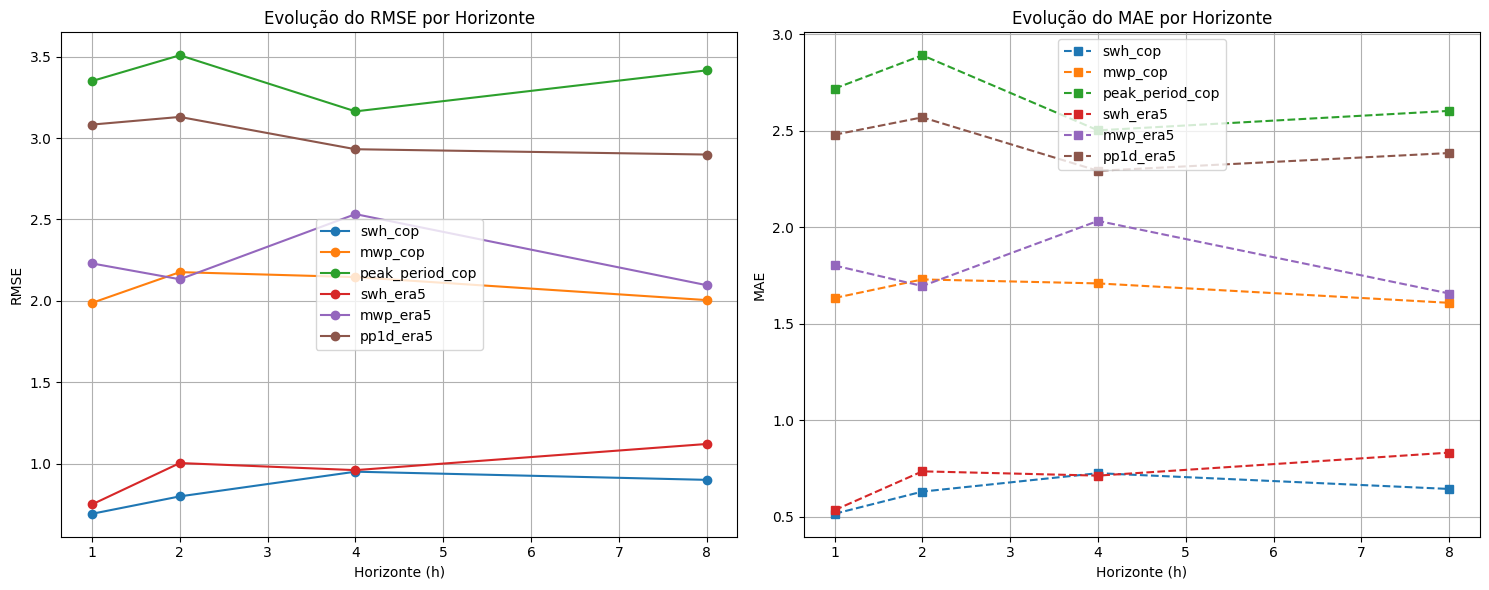

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for target in TARGETS:
    subset = results_df[results_df['target'] == target]
    
    # Gráfico 1: RMSE
    ax1.plot(subset['horizon'], subset['rmse'], marker='o', label=target)
    
    # Gráfico 2: MAE
    ax2.plot(subset['horizon'], subset['mae'], marker='s', linestyle='--', label=target)

# Ajustes do gráfico de RMSE
ax1.set_title('Evolução do RMSE por Horizonte')
ax1.set_xlabel('Horizonte (h)')
ax1.set_ylabel('RMSE')
ax1.legend()
ax1.grid(True)

# Ajustes do gráfico de MAE
ax2.set_title('Evolução do MAE por Horizonte')
ax2.set_xlabel('Horizonte (h)')
ax2.set_ylabel('MAE')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [15]:
results_df['Versão'] = 'Completo'
results_df_corr = pd.DataFrame(results)
results_df_corr['Versão'] = 'Sem Corr/vento'

# 2. Concatenar os dois DataFrames
df_final = pd.concat([results_df, results_df_corr])

# 3. Criar a Pivot Table com Multi-Index nas colunas
# O index será o horizonte, e as colunas serão divididas por Target e depois por Versão
pivot_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='rmse'
)

print("\n--- COMPARAÇÃO DE RESULTADOS (RMSE): COM VS SEM VARIÁVEIS EXÓGENAS ---")
display(pivot_comparativa.round(4))

# --- CORREÇÃO PARA O MAE ---
print("\n--- COMPARAÇÃO DE RESULTADOS (MAE): COM VS SEM VARIÁVEIS EXÓGENAS ---")

# Usamos o df_final (que contém 'Completo' e 'Sem Vento/Corr.')
pivot_mae_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='mae'
)

display(pivot_mae_comparativa.round(4))


--- COMPARAÇÃO DE RESULTADOS (RMSE): COM VS SEM VARIÁVEIS EXÓGENAS ---


target   mwp_cop                mwp_era5                peak_period_cop  \
Versão  Completo Sem Corr/vento Completo Sem Corr/vento        Completo   
horizon                                                                   
1         1.9875         1.5032   2.2298         1.4789          3.3501   
2         2.1764         1.9018   2.1326         1.7594          3.5085   
4         2.1459         1.8966   2.5327         2.0272          3.1638   
8         2.0046         1.9562   2.0962         2.1002          3.4159   

target                 pp1d_era5                 swh_cop                 \
Versão  Sem Corr/vento  Completo Sem Corr/vento Completo Sem Corr/vento   
horizon                                                                   
1               3.0566    3.0827         2.8614   0.6919         0.7296   
2               3.1082    3.1297         2.9803   0.7989         1.0550   
4               3.0957    2.9313         2.9622   0.9506         0.8030   
8               3.0034    2.8986         3.1105   0.9004         0.9779   

target  swh_era5                 
Versão  Completo Sem Corr/vento  
horizon                          
1         0.7496         0.7412  
2         1.0036         0.6540  
4         0.9601         0.6976  
8         1.1208         0.8610


--- COMPARAÇÃO DE RESULTADOS (MAE): COM VS SEM VARIÁVEIS EXÓGENAS ---


target   mwp_cop                mwp_era5                peak_period_cop  \
Versão  Completo Sem Corr/vento Completo Sem Corr/vento        Completo   
horizon                                                                   
1         1.6341         1.2058   1.8027         1.1667          2.7187   
2         1.7304         1.4802   1.6962         1.4119          2.8917   
4         1.7097         1.5311   2.0336         1.5564          2.5027   
8         1.6092         1.5736   1.6574         1.7498          2.6036   

target                 pp1d_era5                 swh_cop                 \
Versão  Sem Corr/vento  Completo Sem Corr/vento Completo Sem Corr/vento   
horizon                                                                   
1               2.4095    2.4800         2.1839   0.5163         0.5042   
2               2.5020    2.5701         2.3908   0.6313         0.7744   
4               2.4916    2.2932         2.3737   0.7266         0.5721   
8               2.4379    2.3852         2.3964   0.6449         0.6813   

target  swh_era5                 
Versão  Completo Sem Corr/vento  
horizon                          
1         0.5350         0.5358  
2         0.7362         0.4510  
4         0.7140         0.5251  
8         0.8333         0.6586

Modelo para mwd_era e mwd_cop

In [16]:
def build_cnn_model(input_shape, output_units=1): # Adiciona este parâmetro
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_units)) # <--- Usa a variável aqui em vez de fixar em 1 ou 2
    model.compile(optimizer='adam', loss='mse')
    return model

In [17]:
def angular_error_deg(true, pred):
    """Diferença angular mínima em graus"""
    delta = np.arctan2(np.sin(np.deg2rad(pred - true)),
                       np.cos(np.deg2rad(pred - true)))
    return np.rad2deg(delta)

In [18]:
def create_supervised_dataset(df, features, target, lookback, horizon):
    # Garante que target é uma lista para a concatenação funcionar
    if isinstance(target, str):
        target = [target]
        
    X, y = [], []
    # Agora features + target será sempre [lista] + [lista]
    data = df[features + target].values  
    
    n_features = len(features)
    n_targets = len(target)

    for i in range(len(data) - lookback - horizon + 1):
        X.append(data[i:i + lookback, :n_features])
        # Seleciona todas as colunas de target
        y.append(data[i + lookback + horizon - 1, n_features:])
        
    return np.array(X), np.array(y)

In [19]:
def circular_metrics(y_true, y_pred):
    # 1. Calcular a diferença absoluta (0-360)
    diff = np.abs(y_true - y_pred) % 360
    
    # 2. Ajustar para o caminho mais curto (se diff > 180, o erro real é 360 - diff)
    # Exemplo: Real 1°, Previsto 359° -> diff = 358. Ajustado = 360 - 358 = 2°
    shortest_diff = np.where(diff > 180, 360 - diff, diff)
    
    # 3. Calcular métricas baseadas na diferença corrigida
    rmse_circ = np.sqrt(np.mean(shortest_diff**2))
    mae_circ = np.mean(shortest_diff)
    
    return rmse_circ, mae_circ

In [20]:
TARGETS = [['mwd_cop_sin','mwd_cop_cos'],['mwd_era5_sin', 'mwd_era5_cos']]
FEATURES = ['uo_cop', 'vo_cop', 'swh_cop', 'mwd_cop_sin','mwd_cop_cos', 'mwp_cop', 'peak_period_cop','u10_era5','v10_era5','swh_era5','mwd_era5_sin','mwd_era5_cos','mwp_era5','pp1d_era5']
results = []

for target in TARGETS:
    for h in HORIZONS:
        print(f'\nTreinar target={target} | horizonte={h}h')

        # 1. Criar dataset (A função que corrigimos antes aceita listas)
        X, y = create_supervised_dataset(df, FEATURES, target, LOOKBACK, h)

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)
        X_train, X_test, scaler = scale_data(X_train, X_test)

        # n_outputs será 2 porque len(['sin', 'cos']) == 2
        n_outputs = y.shape[1] if len(y.shape) > 1 else 1
        
        model = build_cnn_model(X_train.shape[1:], output_units=n_outputs)

        # 2. Treinar
        model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                  epochs=20, batch_size=32, verbose=0)

        # 3. Previsão
        y_pred = model.predict(X_test)

        # --- AVALIAÇÃO ---
        if n_outputs == 2:
            y_test_deg = np.degrees(np.arctan2(y_test[:, 0], y_test[:, 1])) % 360
            y_pred_deg = np.degrees(np.arctan2(y_pred[:, 0], y_pred[:, 1])) % 360
            rmse, mae = circular_metrics(y_test_deg, y_pred_deg)
            r2 = r2_score(y_test_deg, y_pred_deg)
            
            # --- CORREÇÃO DINÂMICA DO NOME ---
            if 'cop' in target[0]:
                target_name = 'mwd_cop'
            else:
                target_name = 'mwd_era5'
        else:
            y_pred = y_pred.ravel() 
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae  = mean_absolute_error(y_test, y_pred)
            r2   = r2_score(y_test, y_pred)
            target_name = target[0] if isinstance(target, list) else target

        print(f'RMSE final = {rmse:.3f} | MAE = {mae:.3f}')

        # IMPORTANTE: results.append tem de estar dentro deste loop (mais à direita)
        results.append({
            'target': target_name,
            'horizon': h,
            'Versão': 'Completo', # Para bater certo com o teu DataFrame final
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })


Treinar target=['mwd_cop_sin', 'mwd_cop_cos'] | horizonte=1h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE final = 31.781 | MAE = 21.090

Treinar target=['mwd_cop_sin', 'mwd_cop_cos'] | horizonte=2h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RMSE final = 42.283 | MAE = 25.842

Treinar target=['mwd_cop_sin', 'mwd_cop_cos'] | horizonte=4h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE final = 49.052 | MAE = 32.292

Treinar target=['mwd_cop_sin', 'mwd_cop_cos'] | horizonte=8h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RMSE final = 53.544 | MAE = 37.848

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=1h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE final = 39.070 | MAE = 23.809

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=2h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE final = 35.149 | MAE = 23.072

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=4h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE final = 48.015 | MAE = 34.573

Treinar target=['mwd_era5_sin', 'mwd_

In [21]:
# Criar o DataFrame filtrando apenas onde o target contém 'mwd'
# Agora isto vai funcionar porque 'rmse' e 'mae' existem no dicionário
df_results_mwd = pd.DataFrame(results)

print(df_results_mwd)


     target  horizon    Versão       rmse        mae        r2
0   mwd_cop        1  Completo  31.781074  21.089762  0.106522
1   mwd_cop        2  Completo  42.282829  25.841597 -0.341165
2   mwd_cop        4  Completo  49.052015  32.292442 -0.526832
3   mwd_cop        8  Completo  53.543973  37.847653 -0.626092
4  mwd_era5        1  Completo  39.069679  23.808885 -0.184195
5  mwd_era5        2  Completo  35.149096  23.072343 -0.221900
6  mwd_era5        4  Completo  48.014652  34.573399 -0.329450
7  mwd_era5        8  Completo  60.539061  46.230396 -0.621524


Modelo para mwd sem variaveis corrente e vento

In [22]:
TARGETS = [['mwd_cop_sin','mwd_cop_cos'],['mwd_era5_sin', 'mwd_era5_cos']]
FEATURES = [ 'swh_cop', 'mwd_cop_sin','mwd_cop_cos', 'mwp_cop', 'peak_period_cop','swh_era5','mwd_era5_sin','mwd_era5_cos','mwp_era5','pp1d_era5']
results = []

for target in TARGETS:
    for h in HORIZONS:
        print(f'\nTreinar target={target} | horizonte={h}h')

        # 1. Criar dataset (A função que corrigimos antes aceita listas)
        X, y = create_supervised_dataset(df, FEATURES, target, LOOKBACK, h)

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)
        X_train, X_test, scaler = scale_data(X_train, X_test)

        # n_outputs será 2 porque len(['sin', 'cos']) == 2
        n_outputs = y.shape[1] if len(y.shape) > 1 else 1
        
        model = build_cnn_model(X_train.shape[1:], output_units=n_outputs)

        # 2. Treinar
        model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                  epochs=20, batch_size=32, verbose=0)

        # 3. Previsão
        y_pred = model.predict(X_test)

        # --- AVALIAÇÃO ---
        if n_outputs == 2:
            y_test_deg = np.degrees(np.arctan2(y_test[:, 0], y_test[:, 1])) % 360
            y_pred_deg = np.degrees(np.arctan2(y_pred[:, 0], y_pred[:, 1])) % 360
            rmse, mae = circular_metrics(y_test_deg, y_pred_deg)
            r2 = r2_score(y_test_deg, y_pred_deg)
            
            # --- CORREÇÃO DINÂMICA DO NOME ---
            if 'cop' in target[0]:
                target_name = 'mwd_cop'
            else:
                target_name = 'mwd_era5'
        else:
            y_pred = y_pred.ravel() 
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae  = mean_absolute_error(y_test, y_pred)
            r2   = r2_score(y_test, y_pred)
            target_name = target[0] if isinstance(target, list) else target

        print(f'RMSE final = {rmse:.3f} | MAE = {mae:.3f}')

        # IMPORTANTE: results.append tem de estar dentro deste loop (mais à direita)
        results.append({
            'target': target_name,
            'horizon': h,
            'Versão': 'Completo', # Para bater certo com o teu DataFrame final
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })


Treinar target=['mwd_cop_sin', 'mwd_cop_cos'] | horizonte=1h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE final = 32.580 | MAE = 20.242

Treinar target=['mwd_cop_sin', 'mwd_cop_cos'] | horizonte=2h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE final = 46.456 | MAE = 30.380

Treinar target=['mwd_cop_sin', 'mwd_cop_cos'] | horizonte=4h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RMSE final = 53.245 | MAE = 38.400

Treinar target=['mwd_cop_sin', 'mwd_cop_cos'] | horizonte=8h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RMSE final = 60.918 | MAE = 46.735

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=1h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RMSE final = 38.208 | MAE = 24.259

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=2h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RMSE final = 45.121 | MAE = 31.016

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=4h
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE final = 47.638 | MAE = 34.103

Treinar target=['mwd_era5_sin', 'mwd_er

In [23]:
df_results_mwd_vento = pd.DataFrame(results)

print(df_results_mwd_vento)

     target  horizon    Versão       rmse        mae        r2
0   mwd_cop        1  Completo  32.579641  20.242448 -0.261696
1   mwd_cop        2  Completo  46.455977  30.379795 -0.131776
2   mwd_cop        4  Completo  53.244656  38.399874 -0.511915
3   mwd_cop        8  Completo  60.918141  46.734729 -0.916012
4  mwd_era5        1  Completo  38.208239  24.259131  0.037475
5  mwd_era5        2  Completo  45.120603  31.016040 -0.311130
6  mwd_era5        4  Completo  47.638468  34.102692 -0.519925
7  mwd_era5        8  Completo  60.250859  46.593926 -0.600490


Cria tabela com os valores todos

In [24]:
df_results_mwd['Versão'] = 'Completo'

df_results_mwd_vento['Versão'] = 'Sem Corr/vento'
df_final = pd.concat([results_df, results_df_corr, df_results_mwd, df_results_mwd_vento])

# 4. Criar as Pivot Tables (o código da Pivot não muda, ela organiza sozinha!)
pivot_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='rmse'
)

pivot_mae_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='mae'
)

print("\n--- COMPARAÇÃO DE RESULTADOS (RMSE) ---")
display(pivot_comparativa.round(4))

print("\n--- COMPARAÇÃO DE RESULTADOS (MAE) ---")
display(pivot_mae_comparativa.round(4))


--- COMPARAÇÃO DE RESULTADOS (RMSE) ---


target   mwd_cop                mwd_era5                 mwp_cop  \
Versão  Completo Sem Corr/vento Completo Sem Corr/vento Completo   
horizon                                                            
1        31.7811        32.5796  39.0697        38.2082   1.9875   
2        42.2828        46.4560  35.1491        45.1206   2.1764   
4        49.0520        53.2447  48.0147        47.6385   2.1459   
8        53.5440        60.9181  60.5391        60.2509   2.0046   

target                 mwp_era5                peak_period_cop                 \
Versão  Sem Corr/vento Completo Sem Corr/vento        Completo Sem Corr/vento   
horizon                                                                         
1               1.5032   2.2298         1.4789          3.3501         3.0566   
2               1.9018   2.1326         1.7594          3.5085         3.1082   
4               1.8966   2.5327         2.0272          3.1638         3.0957   
8               1.9562   2.0962         2.1002          3.4159         3.0034   

target  pp1d_era5                 swh_cop                swh_era5  \
Versão   Completo Sem Corr/vento Completo Sem Corr/vento Completo   
horizon                                                             
1          3.0827         2.8614   0.6919         0.7296   0.7496   
2          3.1297         2.9803   0.7989         1.0550   1.0036   
4          2.9313         2.9622   0.9506         0.8030   0.9601   
8          2.8986         3.1105   0.9004         0.9779   1.1208   

target                  
Versão  Sem Corr/vento  
horizon                 
1               0.7412  
2               0.6540  
4               0.6976  
8               0.8610


--- COMPARAÇÃO DE RESULTADOS (MAE) ---


target   mwd_cop                mwd_era5                 mwp_cop  \
Versão  Completo Sem Corr/vento Completo Sem Corr/vento Completo   
horizon                                                            
1        21.0898        20.2424  23.8089        24.2591   1.6341   
2        25.8416        30.3798  23.0723        31.0160   1.7304   
4        32.2924        38.3999  34.5734        34.1027   1.7097   
8        37.8477        46.7347  46.2304        46.5939   1.6092   

target                 mwp_era5                peak_period_cop                 \
Versão  Sem Corr/vento Completo Sem Corr/vento        Completo Sem Corr/vento   
horizon                                                                         
1               1.2058   1.8027         1.1667          2.7187         2.4095   
2               1.4802   1.6962         1.4119          2.8917         2.5020   
4               1.5311   2.0336         1.5564          2.5027         2.4916   
8               1.5736   1.6574         1.7498          2.6036         2.4379   

target  pp1d_era5                 swh_cop                swh_era5  \
Versão   Completo Sem Corr/vento Completo Sem Corr/vento Completo   
horizon                                                             
1          2.4800         2.1839   0.5163         0.5042   0.5350   
2          2.5701         2.3908   0.6313         0.7744   0.7362   
4          2.2932         2.3737   0.7266         0.5721   0.7140   
8          2.3852         2.3964   0.6449         0.6813   0.8333   

target                  
Versão  Sem Corr/vento  
horizon                 
1               0.5358  
2               0.4510  
4               0.5251  
8               0.6586

In [25]:
# --- RMSE: Versão Completa ---
pivot_rmse_completo = df_final[df_final['Versão'] == 'Completo'].pivot_table(
    index='horizon', 
    columns='target', 
    values='rmse'
)

# --- RMSE: Versão Sem Vento/Corrente ---
pivot_rmse_sem_vento = df_final[df_final['Versão'] == 'Sem Corr/vento'].pivot_table(
    index='horizon', 
    columns='target', 
    values='rmse'
)

In [26]:
# --- MAE: Versão Completa ---
pivot_mae_completo = df_final[df_final['Versão'] == 'Completo'].pivot_table(
    index='horizon', 
    columns='target', 
    values='mae'
)

# --- MAE: Versão Sem Vento/Corrente ---
pivot_mae_sem_vento = df_final[df_final['Versão'] == 'Sem Corr/vento'].pivot_table(
    index='horizon', 
    columns='target', 
    values='mae'
)

In [27]:
print("\n" + "="*20 + " MÉTRICAS: VERSÃO COMPLETA " + "="*20)
print("\n--- RMSE ---")
display(pivot_rmse_completo.round(4))
print("\n--- MAE ---")
display(pivot_mae_completo.round(4))

print("\n\n" + "="*20 + " MÉTRICAS: SEM VENTO/CORRENTE " + "="*20)
print("\n--- RMSE ---")
display(pivot_rmse_sem_vento.round(4))
print("\n--- MAE ---")
display(pivot_mae_sem_vento.round(4))


==================== MÉTRICAS: VERSÃO COMPLETA ====================

--- RMSE ---


target,mwd_cop,mwd_era5,mwp_cop,mwp_era5,peak_period_cop,pp1d_era5,swh_cop,swh_era5
horizon,,,,,,,,
1,31.7811,39.0697,1.9875,2.2298,3.3501,3.0827,0.6919,0.7496
2,42.2828,35.1491,2.1764,2.1326,3.5085,3.1297,0.7989,1.0036
4,49.0520,48.0147,2.1459,2.5327,3.1638,2.9313,0.9506,0.9601
8,53.5440,60.5391,2.0046,2.0962,3.4159,2.8986,0.9004,1.1208



--- MAE ---


target,mwd_cop,mwd_era5,mwp_cop,mwp_era5,peak_period_cop,pp1d_era5,swh_cop,swh_era5
horizon,,,,,,,,
1,21.0898,23.8089,1.6341,1.8027,2.7187,2.4800,0.5163,0.5350
2,25.8416,23.0723,1.7304,1.6962,2.8917,2.5701,0.6313,0.7362
4,32.2924,34.5734,1.7097,2.0336,2.5027,2.2932,0.7266,0.7140
8,37.8477,46.2304,1.6092,1.6574,2.6036,2.3852,0.6449,0.8333




==================== MÉTRICAS: SEM VENTO/CORRENTE ====================

--- RMSE ---


target,mwd_cop,mwd_era5,mwp_cop,mwp_era5,peak_period_cop,pp1d_era5,swh_cop,swh_era5
horizon,,,,,,,,
1,32.5796,38.2082,1.5032,1.4789,3.0566,2.8614,0.7296,0.7412
2,46.4560,45.1206,1.9018,1.7594,3.1082,2.9803,1.0550,0.6540
4,53.2447,47.6385,1.8966,2.0272,3.0957,2.9622,0.8030,0.6976
8,60.9181,60.2509,1.9562,2.1002,3.0034,3.1105,0.9779,0.8610



--- MAE ---


target,mwd_cop,mwd_era5,mwp_cop,mwp_era5,peak_period_cop,pp1d_era5,swh_cop,swh_era5
horizon,,,,,,,,
1,20.2424,24.2591,1.2058,1.1667,2.4095,2.1839,0.5042,0.5358
2,30.3798,31.0160,1.4802,1.4119,2.5020,2.3908,0.7744,0.4510
4,38.3999,34.1027,1.5311,1.5564,2.4916,2.3737,0.5721,0.5251
8,46.7347,46.5939,1.5736,1.7498,2.4379,2.3964,0.6813,0.6586
